In [36]:
import pandas as pd

# Load your data
df = pd.read_csv('cleaned_data.csv')
df.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_difference
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,75111.366667
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,299.066667
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.016667
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,8201.416667
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,72691.016667



Training Metrics:
Accuracy: 0.98
Precision: 0.84
Recall (Sensitivity): 1.00
F1 Score: 0.91
Confusion Matrix:
[[107358   2230]
 [     0  11301]]

Test Metrics:
Accuracy: 0.98
Precision: 0.84
Recall (Sensitivity): 1.00
F1 Score: 0.92
Confusion Matrix:
[[26849   524]
 [    0  2850]]

Confusion Matrix Visualizations:


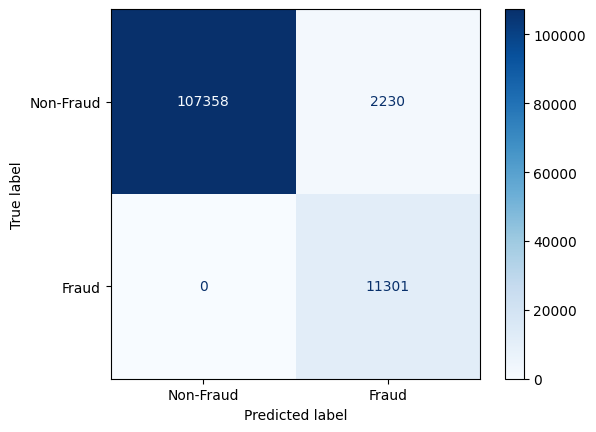

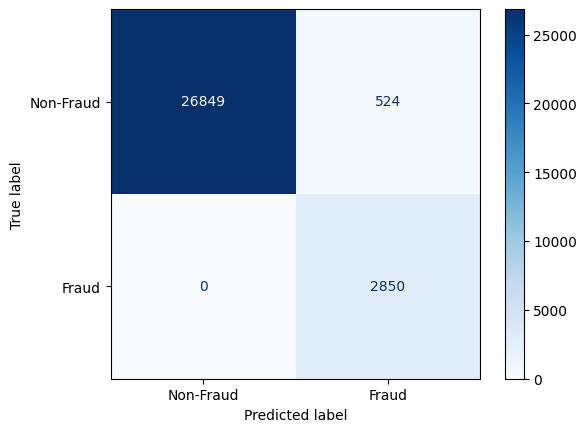

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# Assuming df has the required columns: 'time_difference', 'device_id', 'class'
device_fraud_counts = df[df['class'] == 1]['device_id'].value_counts()
df['device_id_fraud_frequency'] = df['device_id'].map(device_fraud_counts).fillna(0)

# Select features and target
X = df[['time_difference', 'device_id_fraud_frequency']]
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions for training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)  # Sensitivity
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)  # Sensitivity
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Display metrics for training and test sets
print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall (Sensitivity): {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall (Sensitivity): {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

# Optional: Visualize confusion matrices
print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')



Training Metrics:
Accuracy: 1.00
Precision: 1.00
Recall (Sensitivity): 1.00
F1 Score: 1.00
Confusion Matrix:
[[109588      0]
 [     0  11301]]

Test Metrics:
Accuracy: 0.98
Precision: 0.90
Recall (Sensitivity): 0.89
F1 Score: 0.90
Confusion Matrix:
[[27102   271]
 [  318  2532]]

Confusion Matrix Visualizations:


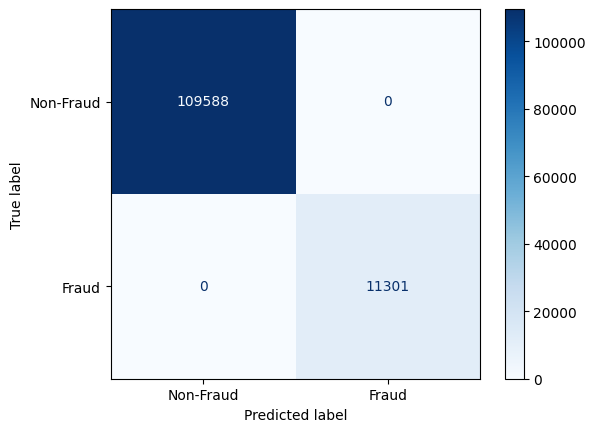

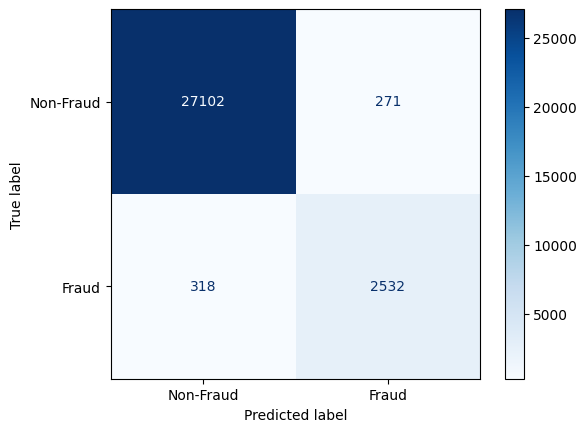

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# Assuming df has the required columns: 'time_difference', 'device_id', 'class'
device_fraud_counts = df[df['class'] == 1]['device_id'].value_counts()
df['device_id_fraud_frequency'] = df['device_id'].map(device_fraud_counts).fillna(0)

# Select features and target
X = df[['time_difference', 'device_id_fraud_frequency']]
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predictions for training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)  # Sensitivity
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)  # Sensitivity
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Display metrics for training and test sets
print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall (Sensitivity): {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall (Sensitivity): {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

# Optional: Visualize confusion matrices
print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')


Training Metrics:
Accuracy: 1.00
Precision: 1.00
Recall (Sensitivity): 1.00
F1 Score: 1.00
Confusion Matrix:
[[109584      4]
 [     1  11300]]

Test Metrics:
Accuracy: 0.98
Precision: 0.90
Recall (Sensitivity): 0.89
F1 Score: 0.90
Confusion Matrix:
[[27103   270]
 [  318  2532]]

Confusion Matrix Visualizations:


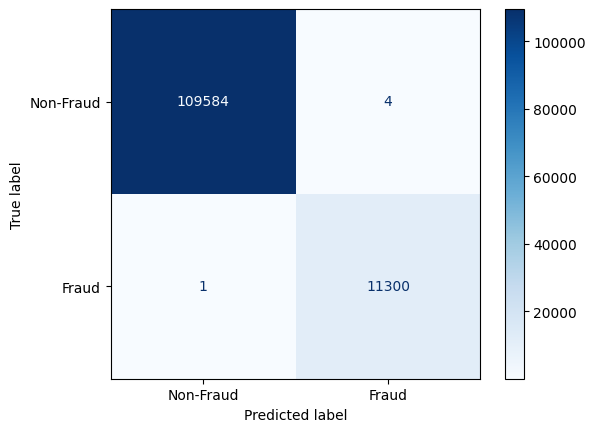

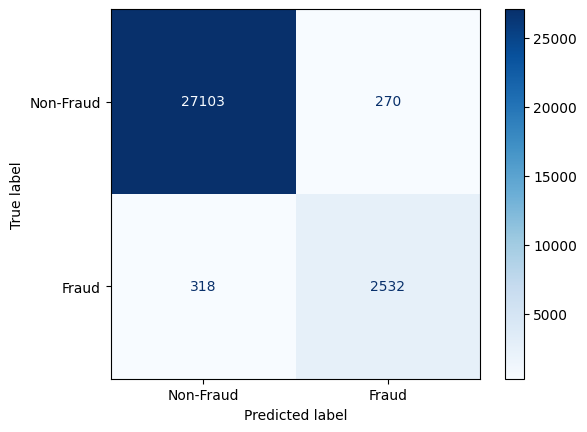

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# Assuming df has the required columns: 'time_difference', 'device_id', 'class'
device_fraud_counts = df[df['class'] == 1]['device_id'].value_counts()
df['device_id_fraud_frequency'] = df['device_id'].map(device_fraud_counts).fillna(0)

# Select features and target
X = df[['time_difference', 'device_id_fraud_frequency']]
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions for training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)  # Sensitivity
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)  # Sensitivity
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Display metrics for training and test sets
print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall (Sensitivity): {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall (Sensitivity): {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

# Optional: Visualize confusion matrices
print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')


Training Metrics:
Accuracy: 1.00
Precision: 1.00
Recall (Sensitivity): 1.00
F1 Score: 1.00
Confusion Matrix:
[[109588      0]
 [     0  11301]]

Test Metrics:
Accuracy: 0.98
Precision: 0.90
Recall (Sensitivity): 0.89
F1 Score: 0.90
Confusion Matrix:
[[27100   273]
 [  318  2532]]

Confusion Matrix Visualizations:


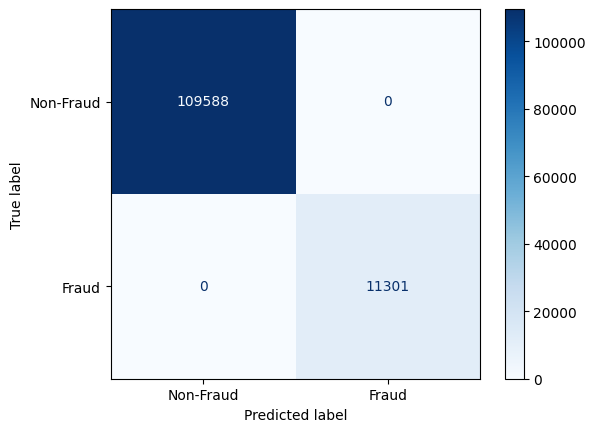

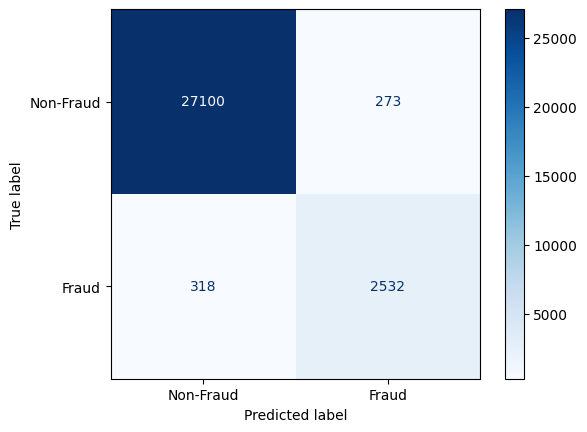

In [42]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

# Assuming df has the required columns: 'time_difference', 'device_id', 'class'
device_fraud_counts = df[df['class'] == 1]['device_id'].value_counts()
df['device_id_fraud_frequency'] = df['device_id'].map(device_fraud_counts).fillna(0)

# Select features and target
X = df[['time_difference', 'device_id_fraud_frequency']]
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base classifiers
logreg = LogisticRegression(class_weight='balanced', random_state=42)
decision_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)

# Voting Classifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[
        ('logreg', logreg),
        ('decision_tree', decision_tree),
        ('random_forest', random_forest)
    ],
    voting='soft'  # Use 'soft' for probabilities
)

# Model training
voting_clf.fit(X_train, y_train)

# Predictions for training and test sets
y_train_pred = voting_clf.predict(X_train)
y_test_pred = voting_clf.predict(X_test)

# Metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)  # Sensitivity
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)  # Sensitivity
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Display metrics for training and test sets
print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall (Sensitivity): {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall (Sensitivity): {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)

# Optional: Visualize confusion matrices
print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

| Model | Train Accuracy | Test Accuracy | Train Precision | Test Precision | Train Recall | Test Recall | Train F1 Score | Test F1 Score |
|--------------------------|----------------|---------------|-----------------|----------------|--------------|-------------|----------------|---------------|
| Logistic Regression      | 0.98           | 0.98          | 0.84            | 0.84           | 1.00         | 1.00        | 0.91           | 0.92          |
| Decision Tree Classifier | 1.00           | 0.98          | 1.00            | 0.90           | 1.00         | 0.89        | 1.00           | 0.90          |
| Random Forest Classifier | 1.00           | 0.98          | 1.00            | 0.90           | 1.00         | 0.89        | 1.00           | 0.90          |
| Voting Classifier        | 1.00           | 0.98          | 1.00            | 0.90           | 1.00         | 0.89        | 1.00           | 0.90          |